In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 26 12:26:40 2022

@author: daphne
"""

from matplotlib import pyplot as plt
import numpy as np
from statistics import median,mean
from math import nan, isnan
from astropy.table import Table, QTable, vstack






In [1]:
# google colab read file in: 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# after mounting drive, copy the path of the directory where the files are stored
save_path='/content/drive/MyDrive/NOFS copy/WiserLabBackup/QueryResults'

In [6]:
# ## vayu's lab comp:
# # save_path = 'C:/Users/sc36/Documents/DaphneUSNO/NOFS copy-20230218T215456Z-001/NOFS copy/QueryResults'

# # wiser's lab comp:
# save_path = '/home/student/djz7128/djz_NOFS/QueryResults'

ast ='{0}/associated_systems_table.ecsv'.format(save_path) 
nast = '{0}/non_associated_systems_table.ecsv'.format(save_path)
associated_systems_table = QTable.read(ast, header_start=0, data_start=1)
non_associated_systems_table = QTable.read(nast, header_start=0, data_start=1)



In [ ]:
old_id_sum = non_associated_systems_table[0]['source_id_a']+ non_associated_systems_table[0]['source_id_b']
repeated_rows=[]
for row in range(1,len(non_associated_systems_table)):
  if row%1000 == 0:
    print(row)
  if non_associated_systems_table[row]['source_id_a']+  non_associated_systems_table[row]['source_id_b'] == old_id_sum:
    repeated_rows.append(row)

  old_id_sum = non_associated_systems_table[row]['source_id_a']+  non_associated_systems_table[row]['source_id_b']
  


In [13]:
""" REMOVE THOSE REPEATED ONES"""

38

In [14]:
non_associated_systems_table

wds_identifier,wds_rownum,source_id_a,source_id_b,ref_epoch_a,ref_epoch_b,ra_a,ra_b,ra_error_a,ra_error_b,dec_a,dec_b,dec_error_a,dec_error_b,parallax_a,parallax_b,parallax_error_a,parallax_error_b,parallax_over_error_a,parallax_over_error_b,pmra_a,pmra_b,pmra_error_a,pmra_error_b,pmdec_a,pmdec_b,pmdec_error_a,pmdec_error_b,radial_velocity_a,radial_velocity_b,radial_velocity_error_a,radial_velocity_error_b,astrometric_params_solved_a,astrometric_params_solved_b,visibility_periods_used_a,visibility_periods_used_b,astrometric_sigma5d_max_a,astrometric_sigma5d_max_b,ruwe_a,ruwe_b,phot_g_mean_mag_a,phot_g_mean_mag_b,phot_g_mean_flux_over_error_a,phot_g_mean_flux_over_error_b,phot_bp_mean_mag_a,phot_bp_mean_mag_b,phot_bp_mean_flux_over_error_a,phot_bp_mean_flux_over_error_b,phot_rp_mean_mag_a,phot_rp_mean_mag_b,phot_rp_mean_flux_over_error_a,phot_rp_mean_flux_over_error_b,bp_rp_a,bp_rp_b,phot_bp_rp_excess_factor_a,phot_bp_rp_excess_factor_b,separation,delta_mu_orbit,delta_mu_ra2,delta_mu_dec2,delta_mu,sigma_delta_mu
,,,,,,deg,deg,mas,mas,deg,deg,mas,mas,mas,mas,mas,mas,,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mas,mas / yr,mas2 / yr2,mas2 / yr2,mas / yr,mas / yr
str13,int64,str19,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
23599-3112TDT,154512,2434946053936490112,2434946053936490624,2016.0,2016.0,359.96355500588083,359.96262455196177,0.032081302255392075,0.017686752602458,-9.612379299063203,-9.61286123239272,0.03117678500711918,0.01464757975190878,2.179866400428931,1.9761075142725293,0.048033613711595535,0.023070620372891426,45.382102966308594,85.65471649169922,18.45443485643451,18.46177236503135,0.03933011367917061,0.021227160468697548,-3.319115917546042,-3.405950197123499,0.034288618713617325,0.015910563990473747,1.3019764423370361,-4.182226657867432,2.7199864387512207,2.7394676208496094,31.0,31.0,13.0,14.0,0.06435806304216385,0.03107656165957451,1.9168193340301514,0.9846497178077698,11.698969841003418,13.467615127563477,3699.547607421875,4054.001708984375,11.975320816040039,13.753835678100586,1682.1719970703125,245.90370178222656,11.253193855285645,12.956023216247559,2170.3193359375,446.86810302734375,0.7221269607543945,0.7978124618530273,1.1968821287155151,1.2314550876617432,3730.585963194251,2.7351806694944614,195.97198773844462,0.007540192109736011,13.999268835569747,0.044692995002613464
23599-0937KPP,154511,2434946053936490112,2434946053936490624,2016.0,2016.0,359.96355500588083,359.96262455196177,0.032081302255392075,0.017686752602458,-9.612379299063203,-9.61286123239272,0.03117678500711918,0.01464757975190878,2.179866400428931,1.9761075142725293,0.048033613711595535,0.023070620372891426,45.382102966308594,85.65471649169922,18.45443485643451,18.46177236503135,0.03933011367917061,0.021227160468697548,-3.319115917546042,-3.405950197123499,0.034288618713617325,0.015910563990473747,1.3019764423370361,-4.182226657867432,2.7199864387512207,2.7394676208496094,31.0,31.0,13.0,14.0,0.06435806304216385,0.03107656165957451,1.9168193340301514,0.9846497178077698,11.698969841003418,13.467615127563477,3699.547607421875,4054.001708984375,11.975320816040039,13.753835678100586,1682.1719970703125,245.90370178222656,11.253193855285645,12.956023216247559,2170.3193359375,446.86810302734375,0.7221269607543945,0.7978124618530273,1.1968821287155151,1.2314550876617432,3730.585963194251,2.7351806694944614,195.97198773844462,0.007540192109736011,13.999268835569747,0.044692995002613464
23599-0412CBL,154510,2447741345626066816,2447741414345542912,2016.0,2016.0,359.9891027371329

In [15]:
associated_systems_table

wds_identifier,wds_rownum,source_id_a,source_id_b,ref_epoch_a,ref_epoch_b,ra_a,ra_b,ra_error_a,ra_error_b,dec_a,dec_b,dec_error_a,dec_error_b,parallax_a,parallax_b,parallax_error_a,parallax_error_b,parallax_over_error_a,parallax_over_error_b,pmra_a,pmra_b,pmra_error_a,pmra_error_b,pmdec_a,pmdec_b,pmdec_error_a,pmdec_error_b,radial_velocity_a,radial_velocity_b,radial_velocity_error_a,radial_velocity_error_b,astrometric_params_solved_a,astrometric_params_solved_b,visibility_periods_used_a,visibility_periods_used_b,astrometric_sigma5d_max_a,astrometric_sigma5d_max_b,ruwe_a,ruwe_b,phot_g_mean_mag_a,phot_g_mean_mag_b,phot_g_mean_flux_over_error_a,phot_g_mean_flux_over_error_b,phot_bp_mean_mag_a,phot_bp_mean_mag_b,phot_bp_mean_flux_over_error_a,phot_bp_mean_flux_over_error_b,phot_rp_mean_mag_a,phot_rp_mean_mag_b,phot_rp_mean_flux_over_error_a,phot_rp_mean_flux_over_error_b,bp_rp_a,bp_rp_b,phot_bp_rp_excess_factor_a,phot_bp_rp_excess_factor_b,separation,delta_mu_orbit,delta_mu_ra2,delta_mu_dec2,delta_mu,sigma_delta_mu
,,,,,,deg,deg,mas,mas,deg,deg,mas,mas,mas,mas,mas,mas,,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mas,mas / yr,mas2 / yr2,mas2 / yr2,mas / yr,mas / yr
str13,int64,str19,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
00001-5700KPP,14,4922504834475011072,4922504834475892480,2016.0,2016.0,0.021763916704399467,0.021016210238420895,0.02732197754085064,0.008454330265522003,-56.9948116880826,-56.994235420911124,0.03022845648229122,0.009164833463728428,15.553320000370277,15.550181839301533,0.03800523281097412,0.011544439010322094,409.2415466308594,1346.984619140625,49.39866441659452,50.87966724745515,0.03470436856150627,0.010437512770295143,16.180406153757062,16.26752493538094,0.04068126901984215,0.01204423326998949,nan,-9.590900421142578,nan,0.7368104457855225,31.0,31.0,28.0,28.0,0.06248260289430618,0.018839415162801743,1.2733317613601685,1.0987781286239624,15.84848690032959,13.330462455749512,1220.012939453125,3487.27587890625,17.229095458984375,14.47518253326416,61.323421478271484,752.6953735351562,14.456870079040527,12.260918617248535,114.3830337524414,1085.56982421875,2.7722253799438477,2.214263916015625,1.719896674156189,1.379959225654602,2540.4091942506784,43.003888017217456,310.94041453245933,0.007589682111629075,17.63371782167819,0.036240634699388485
00002+4119TDS,15,4922504834475011072,4922504834475892480,2016.0,2016.0,0.021763916704399467,0.021016210238420895,0.02732197754085064,0.008454330265522003,-56.9948116880826,-56.994235420911124,0.03022845648229122,0.009164833463728428,15.553320000370277,15.550181839301533,0.03800523281097412,0.011544439010322094,409.2415466308594,1346.984619140625,49.39866441659452,50.87966724745515,0.03470436856150627,0.010437512770295143,16.180406153757062,16.26752493538094,0.04068126901984215,0.01204423326998949,nan,-9.590900421142578,nan,0.7368104457855225,31.0,31.0,28.0,28.0,0.06248260289430618,0.018839415162801743,1.2733317613601685,1.0987781286239624,15.84848690032959,13.330462455749512,1220.012939453125,3487.27587890625,17.229095458984375,14.47518253326416,61.323421478271484,752.6953735351562,14.456870079040527,12.260918617248535,114.3830337524414,1085.56982421875,2.7722253799438477,2.214263916015625,1.719896674156189,1.379959225654602,2540.4091942506784,43.003888017217456,310.94041453245933,0.007589682111629075,17.63371782167819,0.036240634699388485
00005-7212B,65,4701763714691371264,4701763718988276352,2016.0,2016.0,0.13336573072569538,0.13112358417733172,0.00813840702176094,0.01016530953347683,-72.20272613367

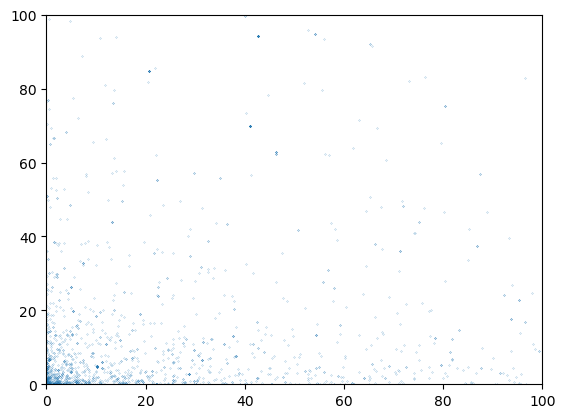

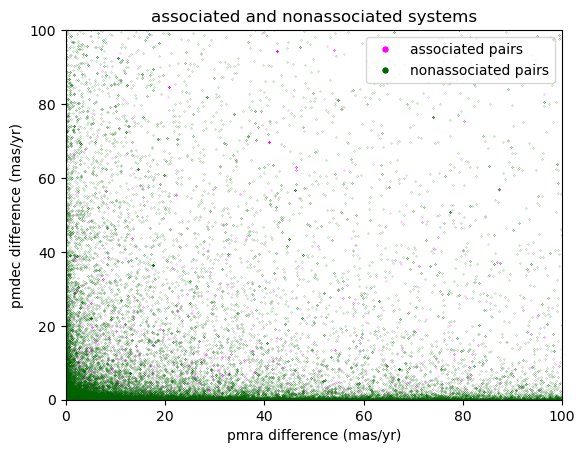

In [ ]:


# plot all pm

a_pmra_diff =  associated_systems_table['delta_mu_ra2']
a_pmdec_diff =  associated_systems_table['delta_mu_dec2']

na_pmra_diff =  non_associated_systems_table['delta_mu_ra2']
na_pmdec_diff =  non_associated_systems_table['delta_mu_dec2']


#plt.style.use('seaborn-dark-palette')
plt.xlim([0,100])
plt.ylim([0,100])
plt.plot(a_pmra_diff, a_pmdec_diff, '.', markersize=.3)
plt.show()




# plot likely and possible




# plt.plot(pmra_pos, pmdec_pos, '.', markersize=.3, color = 'teal')
plt.plot(a_pmra_diff, a_pmdec_diff, '.', markersize=.3, color = 'magenta')
plt.plot(na_pmra_diff, na_pmdec_diff, '.', markersize=.3, color = 'darkgreen')
plt.xlim([0,100])
plt.ylim([0,100])
plt.xlabel('pmra difference')
plt.ylabel('pmdec difference')
plt.title('associated and nonassociated systems')
plt.legend(["associated pairs", "nonassociated pairs"], loc ="upper right", markerscale = 24)
plt.xlabel('pmra difference (mas/yr)')
plt.ylabel('pmdec difference (mas/yr)')
plt.show()


In [ ]:
na_pmra_diff

<Quantity [65.37566606,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ] mas2 / yr2>

In [ ]:

# path2 = '/home/daphne/NOFS/wdstab6-27.ecsv'
# wdstab = Table.read(path2, header_start=0, data_start=1) 



# path3 = '/home/daphne/NOFS/sort_candidates_table.ecsv'
# sort_candidates_tab = Table.read(path3, header_start=0, data_start=1)


# """ GAIA MAGS """

# outliers_c = 0
# outliers = []
# # find list of separaations that aren't 999
# gaia_mags = [] 

# for mag in astrometry_query_stack['phot_g_mean_mag_a*']:
#     if isnan(mag) == False:
#         gaia_mags.append(mag)
       
# for mag in astrometry_query_stack['phot_g_mean_mag_b*']:
#     if isnan(mag) == False:
#         gaia_mags.append(mag)
    

# # Creating dataset
# a = np.array(gaia_mags)
 
# # Creating histogram
# fig, ax = plt.subplots(figsize =(10, 10))
# ax.hist(a, bins = 50)
 
# # Show plot
# plt.show()


# """ WDS MAGS """

# outliers_c = 0
# outliers = []
# # find list of separaations that aren't 999
# wds_mags = [] 

# for mag in wdstab['Mag-pri']:
#     if mag != '.':
#         wds_mags.append(float(mag))
      
# for mag in wdstab['Mag-sec']:
#     if mag != '.':
#         wds_mags.append(float(mag))
    
# # Creating dataset
# a = np.array(wds_mags)
 
# # Creating histogram
# fig, ax = plt.subplots(figsize =(10, 10))
# ax.hist(a, bins = 50)
 
# # Show plot
# plt.show()


# """ --------------------------- PARALLAXES -------------------------------- """

# parallaxes = []

# for parallax in astrometry_query_stack['parallax_a*']:
#     parallaxes.append(parallax)
    
# for parallax in astrometry_query_stack['parallax_b*']:
#     parallaxes.append(parallax)
        
# a = np.array(parallaxes)
 
# # Creating histogram
# fig, ax = plt.subplots(figsize =(10, 10))
# ax.hist(a, bins = 50, range = (0,50))
 
# # Show plot
# plt.show()
    
    